In [30]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")

## Erdos-Renyi model

In [32]:
class AggregationWrapper(object):
    '''
    Simple Wrapper that implements Erdos-Renyi model and Watts-Strogatz Model
    '''
    
    def __init__(self, instance = 1):
        self.instance = random.sample(range(1000), instance)
        self.constant_k = 4
        self.constant_n = 500
        self.avg_deg = 13
        
    def graph_er(self, nodes):
        '''
        graph_er method needs a list of vertices for a graph as input
        returns :list average shortest paths
        '''    
        aspl_vals = []
        for n in nodes:
            p = 1.0 * self.avg_deg/(n-1)
            G = nx.fast_gnp_random_graph(n, p)
            aspl = nx.average_shortest_path_length(G)
            data = (n,p,aspl)
            aspl_vals.append(data)
        return aspl_vals
      
    def graph_ws_aggregation(self, pvalue):
        '''
        graph_ws_aggregation method needs a list probability values as input
        returns : dictionary with clustering coefficient and average shortest path for each probability
        '''  
        dict_agg = {}
        for i in self.instance:
            div = len(self.instance)
            for p in pvalue:
                G1 = nx.watts_strogatz_graph(self.constant_n, self.constant_k, p, seed=i)
                cluster = nx.average_clustering(G1)
                aspl = nx.average_shortest_path_length(G1)
                if p not in dict_agg:
                    dict_agg[p] = [cluster, aspl]
                else:
                    dict_agg[p][0] += 1.0 * cluster
                    dict_agg[p][1] += 1.0 * aspl
            
        dict_res = {k : [dict_agg[k][0]/div, dict_agg[k][1]/div] for k in dict_agg.keys()}    
        return dict_res

In [33]:
nodes_fixed = np.logspace(2, 4, num=20, base=10, dtype='int')

In [34]:
av = AggregationWrapper()
plot_data = av.graph_er(nodes_fixed)

In [35]:
x = [sample[0] for sample in plot_data]
y = [sample[2] for sample in plot_data]

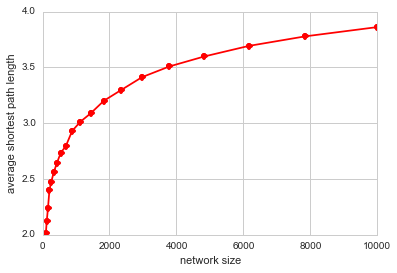

In [36]:
plt.plot(x, y,'ro-')
plt.xlabel('network size')
plt.ylabel('average shortest path length')

## Watts-Strogatz model

In [37]:
p_val = np.logspace(-3, 0, 25)

In [38]:
# 1st cluster , 2nd Avgerge shortest path
av1 = AggregationWrapper(10)
data1 = av1.graph_ws_aggregation(p_val)

In [39]:
x1 = p_val
y1 = [data1[p][0] for p in x1]
z1 = [data1[p][1] for p in x1]

In [40]:
y1 = map(lambda y : y/y1[0], y1)
z1 = map(lambda z : z/z1[0], z1)

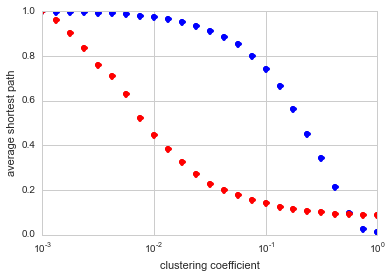

In [41]:
m = plt.plot(x1, y1,'bo')
m = plt.plot(x1, z1,'ro')
plt.xscale('log')

plt.xlabel('clustering coefficient')
plt.ylabel('average shortest path')